# Wine quality

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.dummy import DummyClassifier

from sklearn.metrics import classification_report

## Preparation

In [2]:
dataset = pd.read_csv('dataset/winequality-white.csv', delimiter=';')
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
dataset['target'] = 0
dataset.loc[dataset['quality'] <= 5, 'target'] = 0  
dataset.loc[dataset['quality'] == 6, 'target'] = 1  
dataset.loc[dataset['quality'] >= 7, 'target'] = 2  

(array([1640.,    0.,    0.,    0.,    0., 2198.,    0.,    0.,    0.,
        1060.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

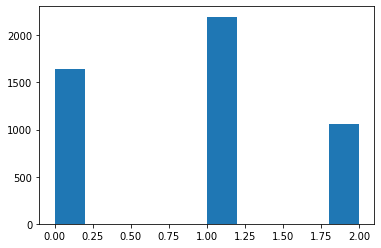

In [4]:
plt.hist(dataset['target'])

In [5]:
dataset = dataset.drop('quality', axis=1)

In [6]:
learn_set = dataset.iloc[0:-500, :]
pred_set = dataset.iloc[-500:, :]
learn_set.shape, pred_set.shape

((4398, 12), (500, 12))

In [7]:
X_learn = learn_set.iloc[:, :-1]
y_learn = learn_set.iloc[:, -1]

X_pred = pred_set.iloc[:, :-1]
y_true = pred_set.iloc[:, -1]

## Model

In [8]:
dummy_clf_mfq = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf_uni = DummyClassifier(strategy="uniform", random_state=42)
dummy_clf_str = DummyClassifier(strategy="stratified", random_state=42)

In [9]:
dummy_clf_mfq.fit(X_learn, y_learn)
dummy_clf_uni.fit(X_learn, y_learn)
dummy_clf_str.fit(X_learn, y_learn)

DummyClassifier(constant=None, random_state=42, strategy='stratified')

## Performance

In [10]:
# Target class distribution
y_true.value_counts(True, False)

0    0.268
1    0.564
2    0.168
Name: target, dtype: float64

In [11]:
y_pred = dummy_clf_mfq.predict(X_pred)

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       134
     class 1       0.56      1.00      0.72       282
     class 2       0.00      0.00      0.00        84

    accuracy                           0.56       500
   macro avg       0.19      0.33      0.24       500
weighted avg       0.32      0.56      0.41       500



/Users/charlespaulasvictor/Documents/HETIC/M2/EDA/wine/venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
y_pred = dummy_clf_uni.predict(X_pred)

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.30      0.38      0.34       134
     class 1       0.56      0.33      0.42       282
     class 2       0.19      0.37      0.25        84

    accuracy                           0.35       500
   macro avg       0.35      0.36      0.34       500
weighted avg       0.43      0.35      0.37       500



In [13]:
y_pred = dummy_clf_str.predict(X_pred)

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.24      0.31      0.27       134
     class 1       0.55      0.43      0.48       282
     class 2       0.11      0.13      0.12        84

    accuracy                           0.35       500
   macro avg       0.30      0.29      0.29       500
weighted avg       0.39      0.35      0.36       500

